# Estadística sobre las Trayectorias.
Varias medidas en busca de significado estadístico de los cálculos de las trayectorias de los Centros de Masa, definidos en el Notebook TrackingtheTracks.

In [2]:
using JLD
using PyPlot

In [4]:
Datos=load("GarbageCollector/Catenarios4AP-01.jld")

Dict{ByteString,Any} with 2 entries:
  "CatenarioPositivo" => Set(Array{Any,N}[…
  "CatenarioNegativo" => Set(Array{Any,N}[…

In [6]:
CatenarioPozos=Datos["CatenarioNegativo"]
CatenarioFuentes=Datos["CatenarioPositivo"];

In [7]:
pozo=pop!(CatenarioPozos)

3x4 Array{Any,2}:
 17.0  64.0  -4.18434  870.0
 17.0  64.0  -3.36551  871.0
 17.0  64.0  -2.06754  872.0

In [17]:
function PurgaCatenarios(Xs::Set, marcagor=45, minlargo=5, muevemin=1)
    #Funcion que le quita las cadenas a un catenario según los criterios que use para las graficas (longitud,peso, dispersion)  
   
    result=Set{Array{Any}}()
    
    for p in Xs
      gordura=abs(map(Float32,p[:,3]))
      desviax=std(map(Float32,p[:,1]))
      desviay=std(map(Float32,p[:,2]))
      longus,falsus=size(p)  
      if mean(gordura)> marcagor && (desviax>muevemin || desviay>muevemin) && longus> minlargo 
            push!(result, p)
      end
    end  
    return result
end

PurgaCatenarios (generic function with 4 methods)

In [25]:
function dist2D(x::Array,y::Array)
    result=sqrt((x[1]-y[1])^2+(x[2]-y[2])^2)
    return result
end

function distanciasAcumuladas(cadena::Array)
    jmax,bla=size(cadena)
    result=zeros(jmax)
    acu=0
    for j=1:jmax-1
        acu+=dist2D(cadena[j,:],cadena[j+1,:])
        result[j+1]=acu
    end
    return result
end
    

distanciasAcumuladas (generic function with 1 method)

In [18]:
CadenasPozos=PurgaCatenarios(CatenarioPozos);

In [19]:
length(CadenasPozos)

221

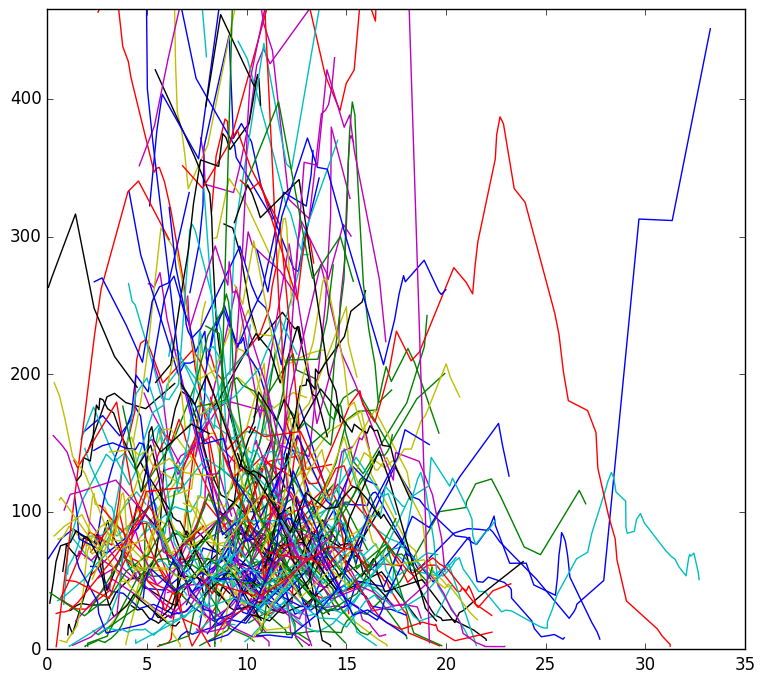

In [38]:
PyPlot.ion()
figure(figsize=(9,8))
#axis("equal")
#xlim(0.0,25.0)
ylim(0.0,465.0)

for p in CadenasPozos
    offset=p[1,4]/100
    xxpos=distanciasAcumuladas(p)+offset
    yypos=map(x->abs(x), p[:,3])
    plot(xxpos,yypos)
end

In [22]:
size(cadenaejemplo)

(12,4)

In [30]:
cadenaejemplo[:,3]

12-element Array{Any,1}:
 -124.616 
 -108.09  
 -111.918 
 -104.745 
 -113.998 
  -93.1878
  -85.7212
  -92.6243
  -79.7626
  -88.6456
  -87.6148
 -108.048 

In [26]:
distanciasAcumuladas(cadenaejemplo)

12-element Array{Float64,1}:
 0.0     
 0.988247
 1.15535 
 1.19031 
 1.79694 
 2.80356 
 2.97577 
 3.87048 
 5.83837 
 6.2796  
 6.4854  
 8.21923 

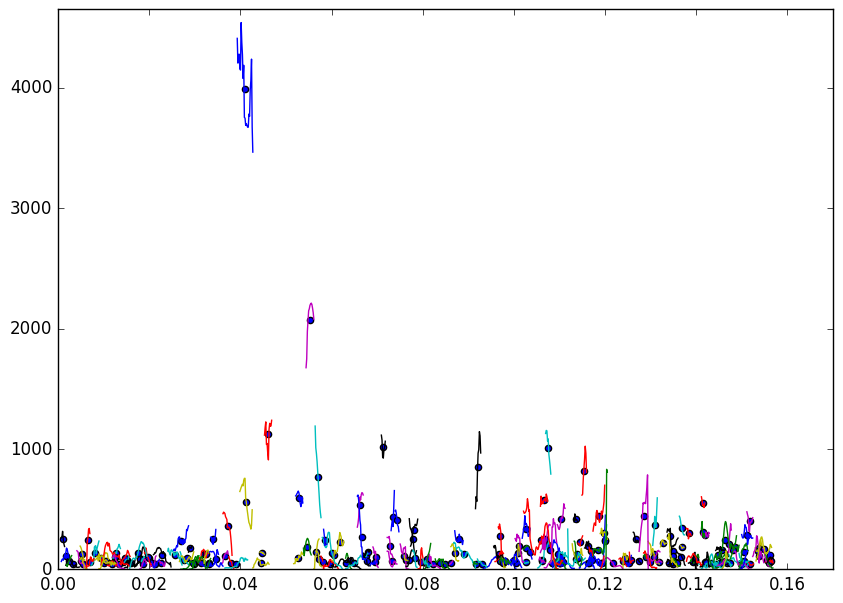

In [43]:
PyPlot.ion()
figure(figsize=(10,7))
#axis("equal")
xlim(0.0,0.170)
ylim(0.0,4650.0)

for p in CadenasPozos
    xxpos=p[:,4]/7022
    timecentro=mean(xxpos)
    yypos=map(x->abs(x), p[:,3])
    gordocentro=mean(yypos)
    plot(xxpos,yypos)
    scatter(timecentro,gordocentro)
end

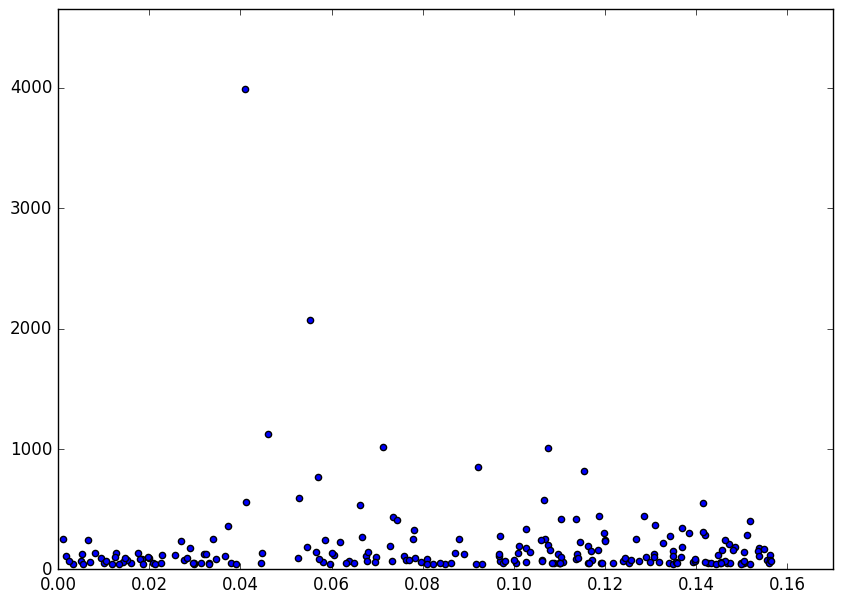

In [44]:
PyPlot.ion()
figure(figsize=(10,7))
#axis("equal")
xlim(0.0,0.170)
ylim(0.0,4650.0)

for p in CadenasPozos
    xxpos=p[:,4]/7022
    timecentro=mean(xxpos)
    yypos=map(x->abs(x), p[:,3])
    gordocentro=mean(yypos)
    #plot(xxpos,yypos)
    scatter(timecentro,gordocentro)
end